In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import urllib.request, json 
import matplotlib.lines as lines

from src.data_collection import *
from src.constants import *

In [2]:
confirm = get_global_cases_total()
death = get_global_deaths_total()
c = confirm.diff().fillna(0).astype(int)
d = death.diff().fillna(0).astype(int)

Global cases (total) by country fetched for 12-21
Global deaths (total) by country fetched for 12-21


# Countries CFR by delay

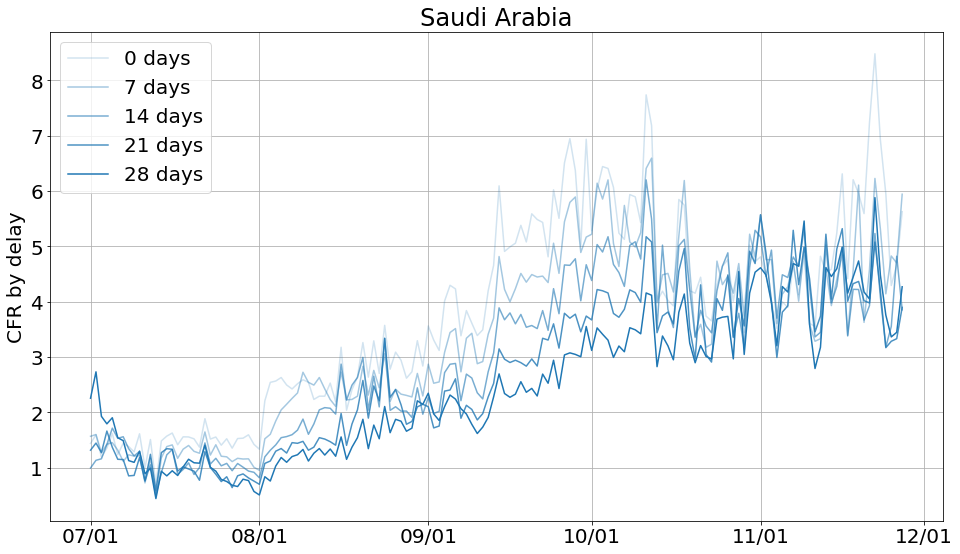

In [3]:
fig, ax = plt.subplots(figsize=(16,9))
country = 'Saudi Arabia'
cutoff = -150

for delay, alpha in zip([0,7,14,21,28],[0.2,0.4,0.6,0.8,1]):
    ax.plot(100*(d[country] / c[country].shift(delay))[cutoff:], c='C0', alpha=alpha, label=str(delay)+' days')
    
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('CFR by delay', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title(country, fontsize=24)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

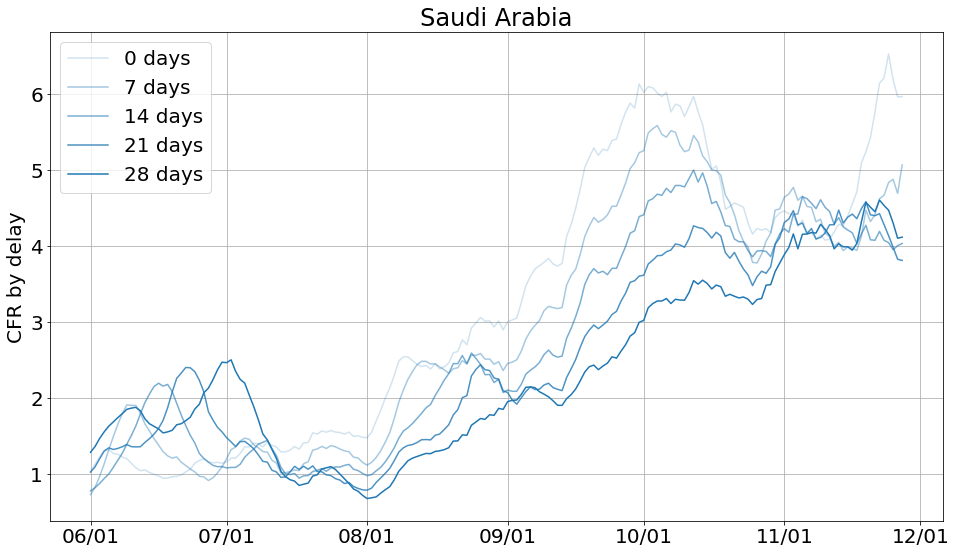

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
country = 'Saudi Arabia'
cutoff = -180

for delay, alpha in zip([0,7,14,21,28],[0.2,0.4,0.6,0.8,1]):
    ax.plot((100*(death-death.shift(7))[country] / (confirm.shift(delay)-confirm.shift(delay+7))[country])[cutoff:], c='C0', alpha=alpha, label=str(delay)+' days')
    
    
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('CFR by delay', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title(country, fontsize=24)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# US states adjust by delay

In [142]:
c = get_US()
d = get_US_death()

US cases by state fetched for 2020-11-28
US deaths by state fetched for 2020-11-28


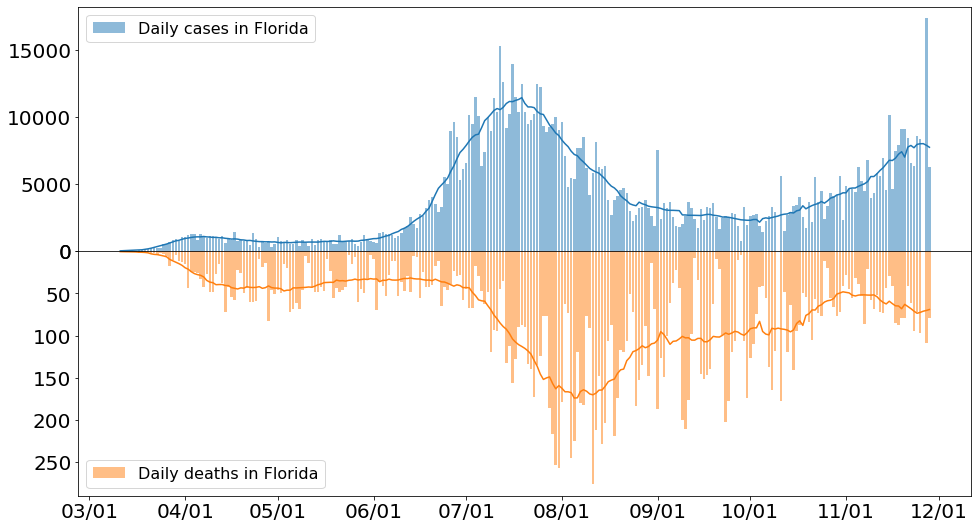

In [12]:
state = 'Florida'

fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)
cutoff = 50
axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())
axs[1].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
axs[1].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean(), c='C1')
axs[1].invert_yaxis()
axs[0].set_ylim(bottom=0)
axs[1].set_ylim(top=0)

# axs[0].set_ylim(top=10000)
# axs[1].set_ylim(bottom=100)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

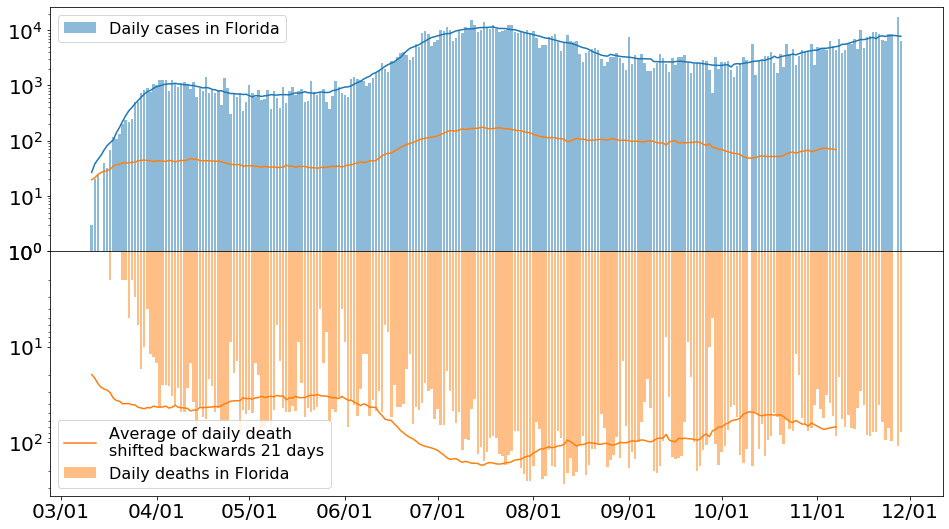

In [7]:
state = 'Florida'

fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)
cutoff = 50
axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())

axs[1].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
shift=21
axs[1].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1', label='Average of daily death\nshifted backwards %d days'%shift)
axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].invert_yaxis()

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[1].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

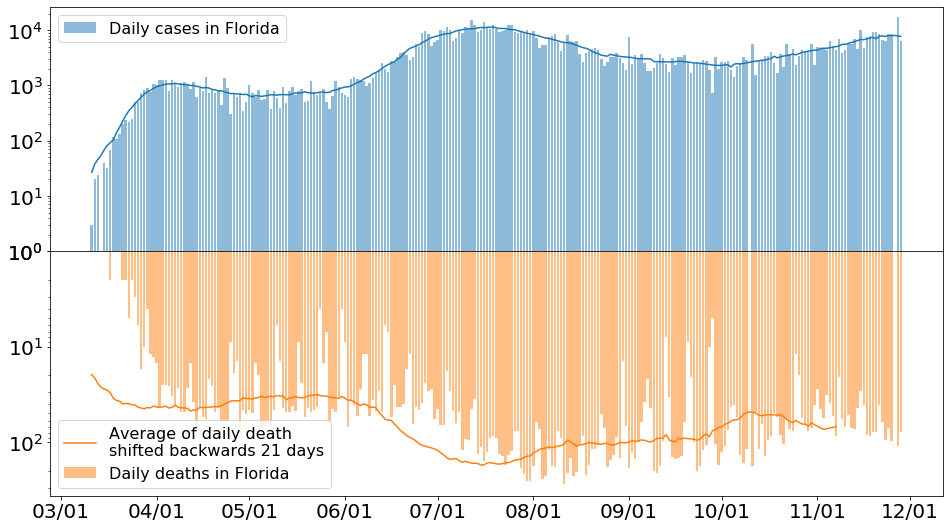

In [8]:
state = 'Florida'
cutoff = 50


fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())

axs[1].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
shift=21
axs[1].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1', label='Average of daily death\nshifted backwards %d days'%shift)
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].invert_yaxis()

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[1].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

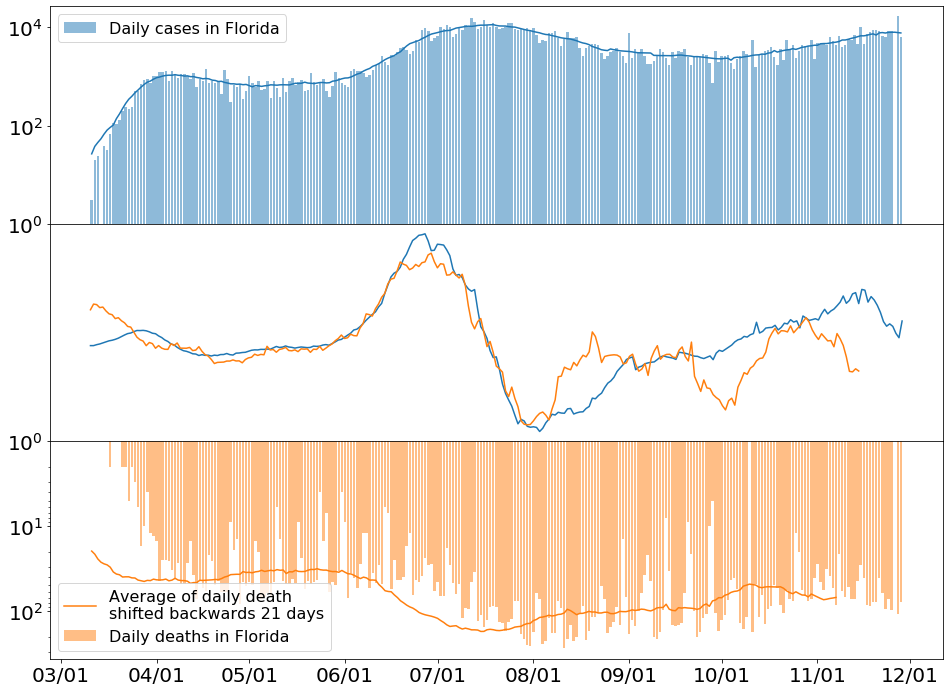

In [9]:
state = 'Florida'
cutoff = 50
window = 14
c_ = c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
d_ = d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
scale = c_.max()/d_.max()

fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c_)

axs[2].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
shift=21
axs[2].plot(d_.shift(-shift), c='C1', label='Average of daily death\nshifted backwards %d days'%shift)
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].plot(c_.diff().rolling(min_periods=1, window=14, center=True).mean())
axs[1].plot(scale * d_.diff().shift(-shift).rolling(min_periods=1, window=14, center=True).mean())

axs[2].invert_yaxis()

axs[0].set_yscale('log')
axs[2].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[2].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[2].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[2].tick_params(labelsize=20)

## Final

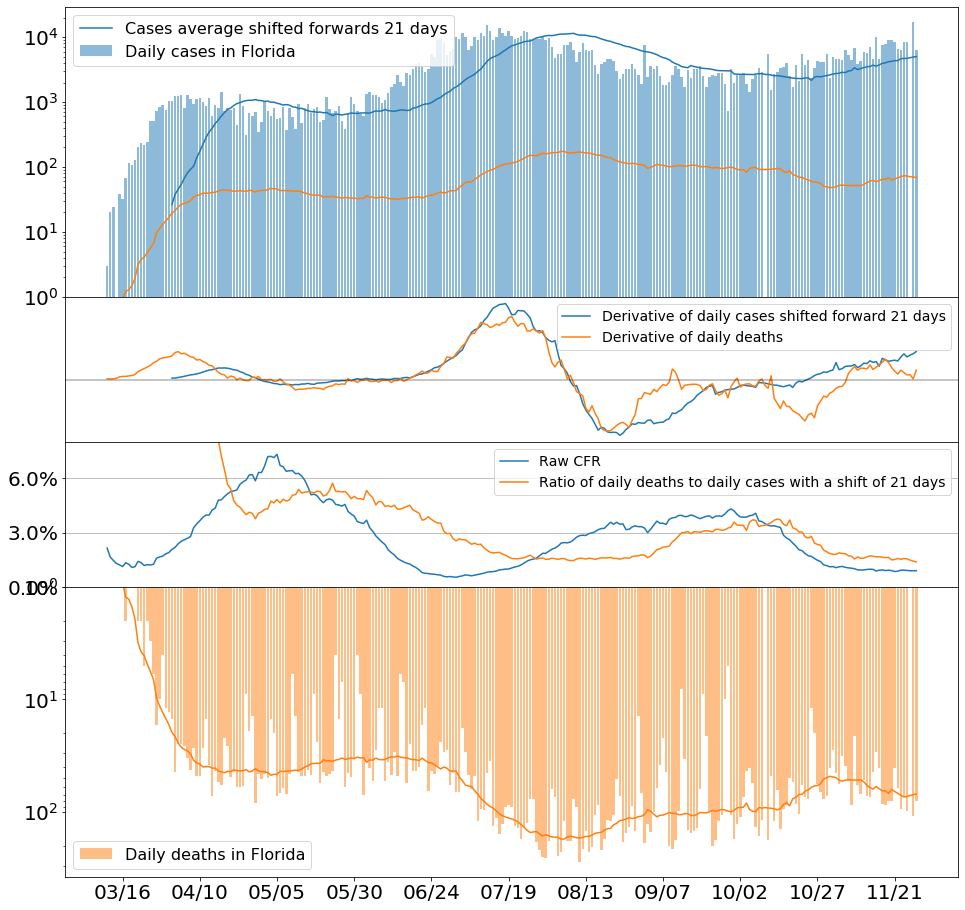

In [143]:
state = 'Florida'
cutoff = 50
window = 14
shift = 21

c_ = c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
d_ = d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
scale = c_.max()/d_.max()

fig, axs = plt.subplots(figsize=(16,16), nrows=4, ncols=1, gridspec_kw={'height_ratios': [2,1,1,2]}, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c_.shift(shift), label='Cases average shifted forwards %d days'%shift, c='C0')
axs[0].plot(d_, c='C1', )

axs[3].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
axs[3].plot(d_, c='C1', )
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].plot(c_.diff().rolling(min_periods=1, window=14, center=True).mean().shift(shift), label='Derivative of daily cases shifted forward %d days'%shift)
axs[1].plot(scale * d_.diff().rolling(min_periods=1, window=14, center=True).mean(), label='Derivative of daily deaths')
axs[1].axhline(y=0, c='k', alpha=0.3)

axs[2].plot(100*d_/c_, label='Raw CFR')
axs[2].plot(100*d_/c_.shift(shift), label='Ratio of daily deaths to daily cases with a shift of %s days'%shift)
axs[2].set_ylim(top=8, bottom=0)
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[2].grid(axis='y')

axs[3].invert_yaxis()
axs[0].set_yscale('log')
axs[3].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[3].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=14)
axs[2].legend(fontsize=14)
axs[3].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[3].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[0].tick_params(labelsize=20)
axs[2].tick_params(labelsize=20)
axs[2].yaxis.set_major_locator(plt.MaxNLocator(3))
axs[3].tick_params(labelsize=20)

# swirling plot

In [105]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df.date = pd.to_datetime(df.date,yearfirst=True, format='%Y%m%d')

In [107]:
# fig, ax = plt.subplots(figsize=(16,9))

# for state in df['state'].unique():
#     focus = df[df['state']==state].set_index('date').sort_index()
#     a = (focus['positiveIncrease']/ focus['totalTestResultsIncrease']*100)
#     b = focus['deathIncrease'] / focus['positiveIncrease'] * 100

#     ax.scatter(x=a.values, y=b.values, c='C0', alpha=0.3, s=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(left=0.01,right=100)
# ax.set_ylim(bottom=0.01,top=100)
# ax.grid()
# ax.set_xlabel('Positive rate percentage', fontsize=20)
# ax.set_ylabel('Death rate percentage', fontsize=20)
# ax.tick_params(labelsize=20)

In [106]:
# fig, ax = plt.subplots(figsize=(16,9))
# window = 14
# cutoff = 5

# for state in df['state'].unique():
#     focus = df[df['state']==state].set_index('date').sort_index()
#     a = (focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum()/ focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).sum()*100)[75:]
#     b = (focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).sum() / focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum() * 100)[75:]
#     c = pd.DataFrame({'a':a, 'b':b, 'alpha':np.linspace(start=0.2, stop=1, num=len(a))})
    
    
# #     ax.scatter(x = c.a, y=c.b, alpha=c.alpha)
#     sns.scatterplot(data=c, x='a', y='b', hue='alpha', )
    
# # ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# ax.get_legend().remove()

# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(left=0.1,right=100)
# ax.set_ylim(bottom=0.1,top=100)
# ax.grid()
# ax.set_xlabel('Positive rate percentage', fontsize=20)
# ax.set_ylabel('Death rate percentage', fontsize=20)
# ax.tick_params(labelsize=20)

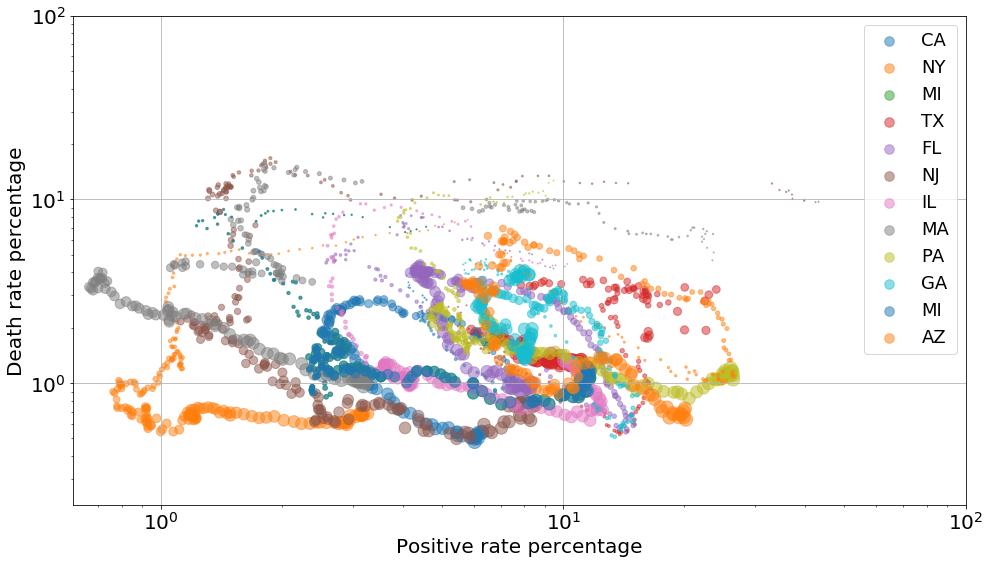

In [108]:
fig, ax = plt.subplots(figsize=(16,9))

# for state in df['state'].unique():
for state in ['CA','NY','MI','TX','FL','NJ','IL','MA','PA','GA','MI','AZ']:
    focus = df[df['state']==state].set_index('date').sort_index()
    a = (focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum()/ focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).sum()*100)[75:]
    b = (focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).sum() / focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum() * 100)[75:]
    c = pd.DataFrame({'a':a, 'b':b, 'alpha':np.power(np.linspace(start=1, stop=8, num=len(a)),2.5)})

    ax.scatter(x=c.a, y=c.b, alpha=0.5, s=c.alpha, label=state)
ax.legend(fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(right=100)
ax.set_ylim(top=100)
ax.grid()
ax.set_xlabel('Positive rate percentage', fontsize=20)
ax.set_ylabel('Death rate percentage', fontsize=20)
ax.tick_params(labelsize=20)

In [111]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
data = pd.DataFrame(data).set_index('date')
data.index = pd.to_datetime(data.index, yearfirst=True, format='%Y%m%d')
data = data.sort_index()

In [158]:
state = 'Florida'
abbr = 'FL'
cutoff = 50

a = data[data['state']==abbr]
c = get_US()[state]
d = get_US_death()[state]

US cases by state fetched for 2020-11-28
US deaths by state fetched for 2020-11-28


In [191]:
(focus.death / focus.case).replace([np.inf, -np.inf], np.nan).dropna().mean()

0.029275499279536415

In [189]:
focus.cfr_shift.replace([np.inf, -np.inf], np.nan).dropna().mean()

0.03365964267917444

In [227]:
focus = pd.DataFrame({'case':c,
                     'death':d,
                     'test':a['totalTestResultsIncrease']})[cutoff:]
focus['area'] = np.power(np.linspace(start=1, stop=8, num=len(focus)),2.5)
# focus['cfr_shift'] = pd.concat([(focus.death / focus.case.shift(5))[:60], 
#                                 (focus.death / focus.case.shift(21))[60:]])

focus['cfr_shift'] = pd.concat([(focus.death.rolling(min_periods=1, center=True, window=14).mean() / focus.case.rolling(min_periods=1, center=True, window=14).mean().shift(5))[:60], 
                                (focus.death.rolling(min_periods=1, center=True, window=14).mean() / focus.case.rolling(min_periods=1, center=True, window=14).mean().shift(21))[60:]])

In [228]:
focus.cfr_shift.rolling(min_periods=1, center=True, window=14).mean()

2020-03-11    0.033405
2020-03-12    0.031655
2020-03-13    0.030673
2020-03-14    0.030264
2020-03-15    0.031654
                ...   
2020-11-24    0.015291
2020-11-25    0.015192
2020-11-26    0.015097
2020-11-27    0.014966
2020-11-28    0.014977
Freq: D, Name: cfr_shift, Length: 263, dtype: float64

In [226]:
focus.head(10)

,case,death,test,area,cfr_shift
2020-03-11,3,0,71.0,1.000000,NaN
2020-03-12,20,0,53.0,1.068138,NaN
2020-03-13,24,0,118.0,1.138989,NaN
2020-03-14,0,1,199.0,1.212587,NaN
2020-03-15,39,0,436.0,1.288967,NaN
2020-03-16,32,1,181.0,1.368163,0.333333
2020-03-17,69,2,591.0,1.450209,0.100000
2020-03-18,116,1,704.0,1.535139,0.041667
2020-03-19,108,1,1055.0,1.622985,inf
2020-03-20,130,1,1102.0,1.713780,0.025641


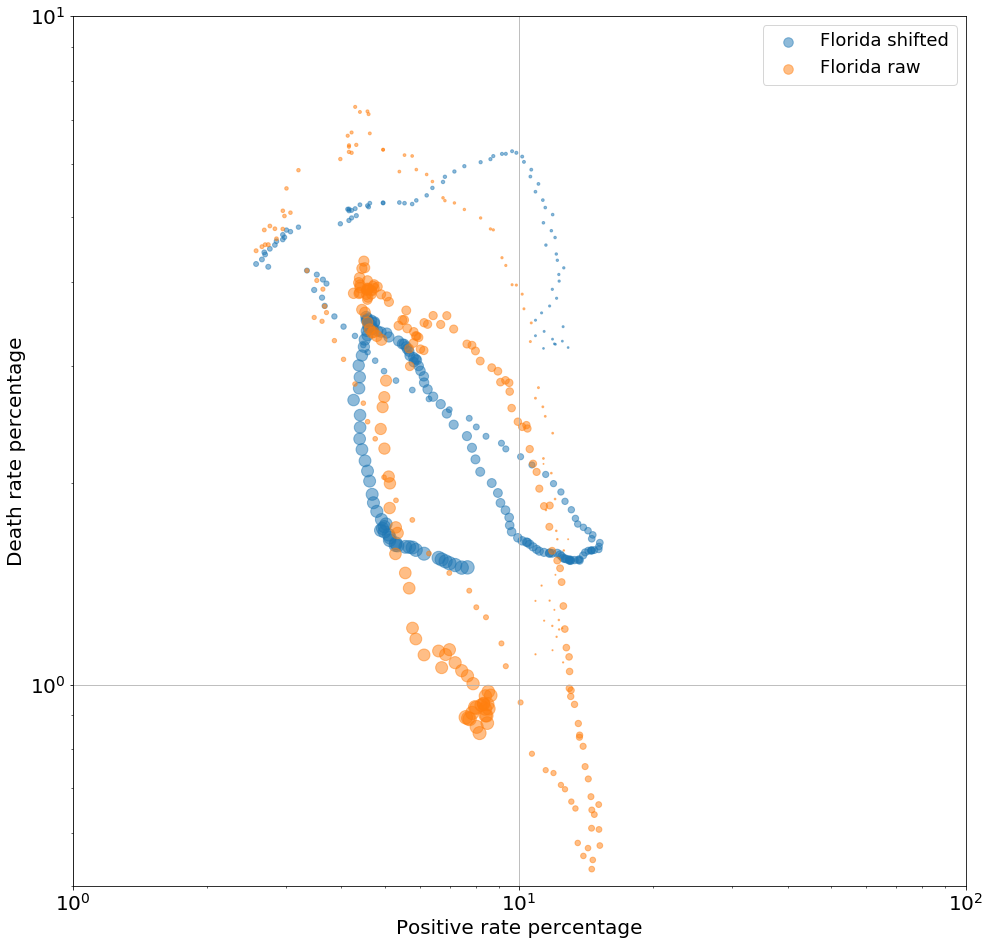

In [231]:
fig, ax = plt.subplots(figsize=(16,16))
shift = 21

ax.scatter(x=100 * (focus.case.rolling(min_periods=1, center=True, window=14).mean() / focus.test.rolling(min_periods=1, center=True, window=14).mean()).shift(shift),
           y=100 * focus.cfr_shift.rolling(min_periods=1, center=True, window=14).mean(),
          alpha=0.5, s=focus.area, label=state+' shifted', c='C0')

ax.scatter(x=100 * (focus.case.rolling(min_periods=1, center=True, window=14).mean() / focus.test.rolling(min_periods=1, center=True, window=14).mean()),
           y=100 * focus.death.rolling(min_periods=1, center=True, window=14).mean() / focus.case.rolling(min_periods=1, center=True, window=14).mean(), 
          alpha=0.5, s=focus.area, label=state+' raw', c='C1')


ax.legend(fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1, right=100)
ax.set_ylim(bottom=0.5, top=10)
ax.grid()
ax.set_xlabel('Positive rate percentage', fontsize=20)
ax.set_ylabel('Death rate percentage', fontsize=20)
ax.tick_params(labelsize=20)

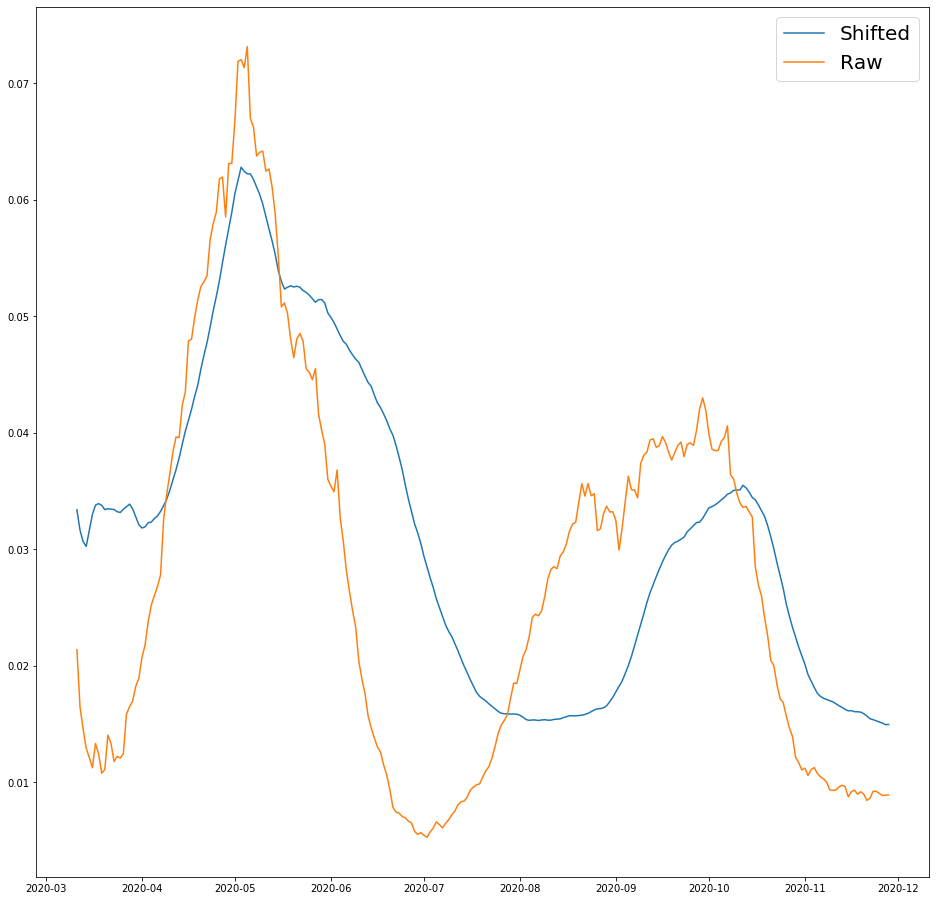

In [229]:
fig, ax = plt.subplots(figsize=(16,16))

ax.plot(focus.cfr_shift.rolling(min_periods=1, center=True, window=14).mean(), label='Shifted')
ax.plot((focus.death.rolling(min_periods=1, center=True, window=14).mean() / focus.case.rolling(min_periods=1, center=True, window=14).mean()), label='Raw')

ax.legend(fontsize=20)

In [237]:
data.columns

Index(['state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNeg',
    

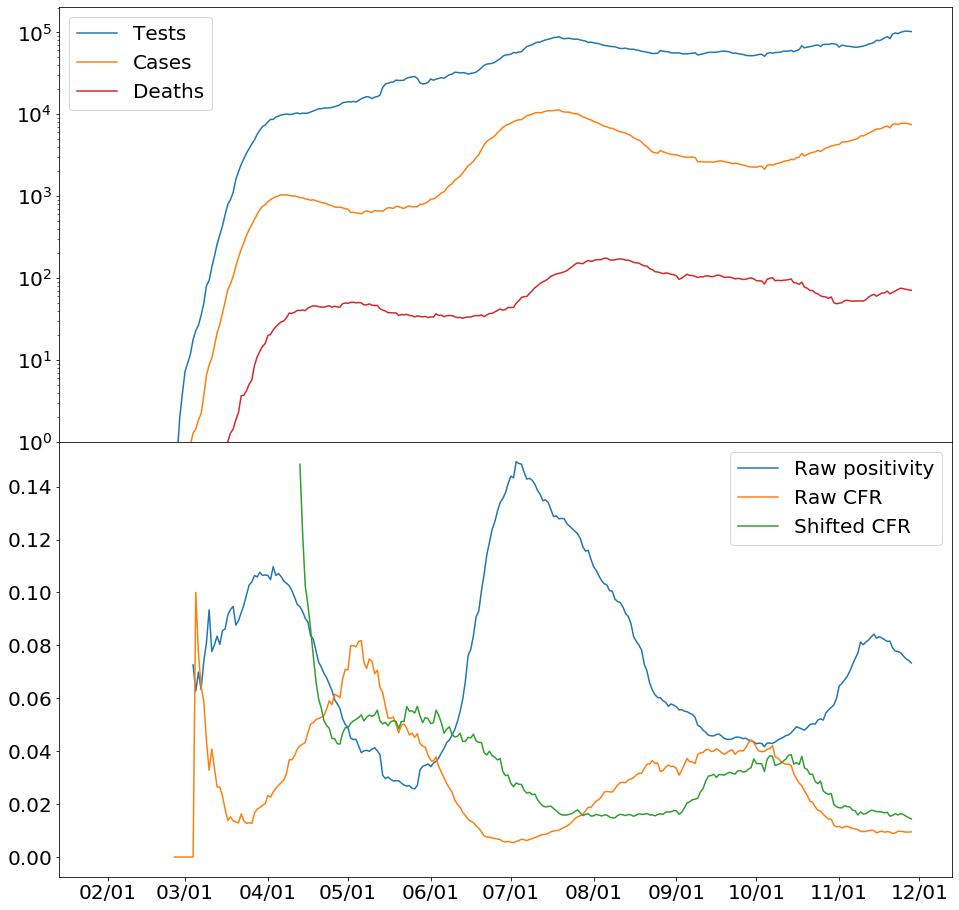

In [277]:
fig, axs = plt.subplots(figsize=(16,16), nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

k = data.query('state=="FL"')
axs[0].plot(k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Tests')
axs[0].plot(k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Cases')
axs[0].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Deaths',c='C3')

axs[0].legend(fontsize=20)
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[0].tick_params(labelsize=20)

axs[1].plot(k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean()[35:], label='Raw positivity')
axs[1].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Raw CFR')
axs[1].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean().shift(21)[75:], label='Shifted CFR')

axs[1].legend(fontsize=20)
axs[1].tick_params(labelsize=20)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))



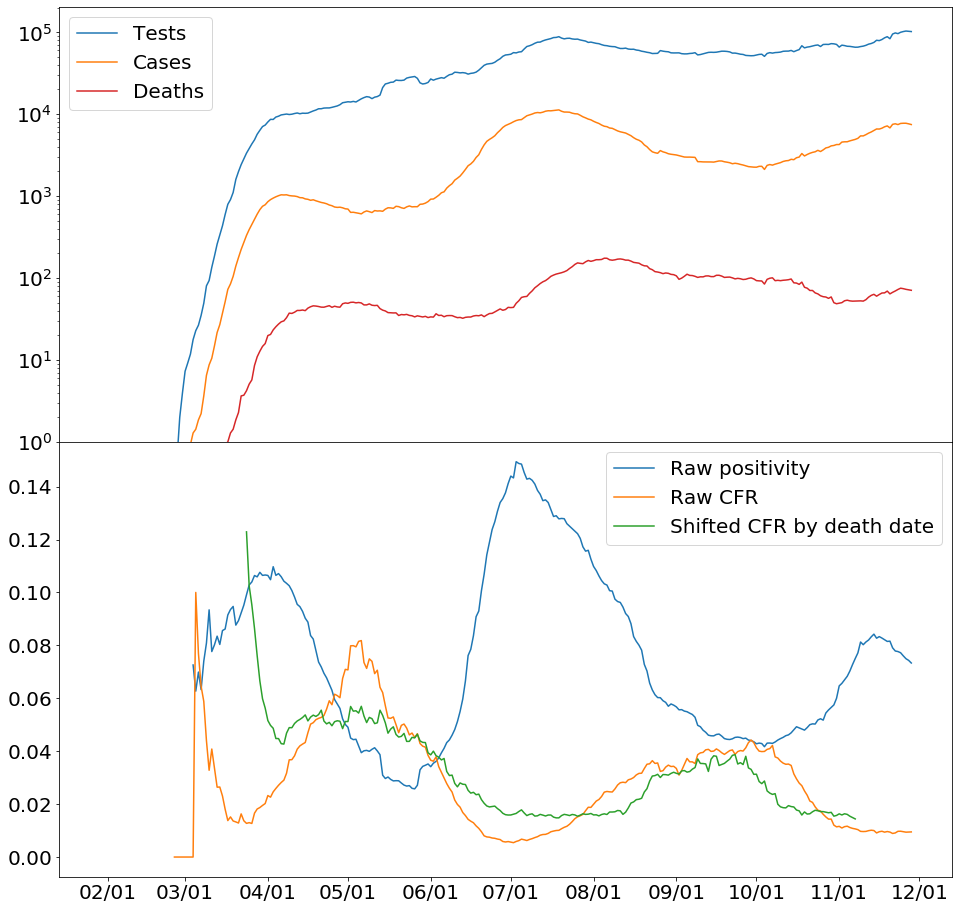

In [281]:
fig, axs = plt.subplots(figsize=(16,16), nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

k = data.query('state=="FL"')
axs[0].plot(k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Tests')
axs[0].plot(k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Cases')
axs[0].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Deaths',c='C3')

axs[0].legend(fontsize=20)
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[0].tick_params(labelsize=20)

axs[1].plot(k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean()[35:], label='Raw positivity')
axs[1].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Raw CFR')
# axs[1].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean().shift(21)[75:], label='Shifted CFR')
axs[1].plot((k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean().shift(-21) / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean())[55:], label='Shifted CFR by death date')

axs[1].legend(fontsize=20)
axs[1].tick_params(labelsize=20)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))



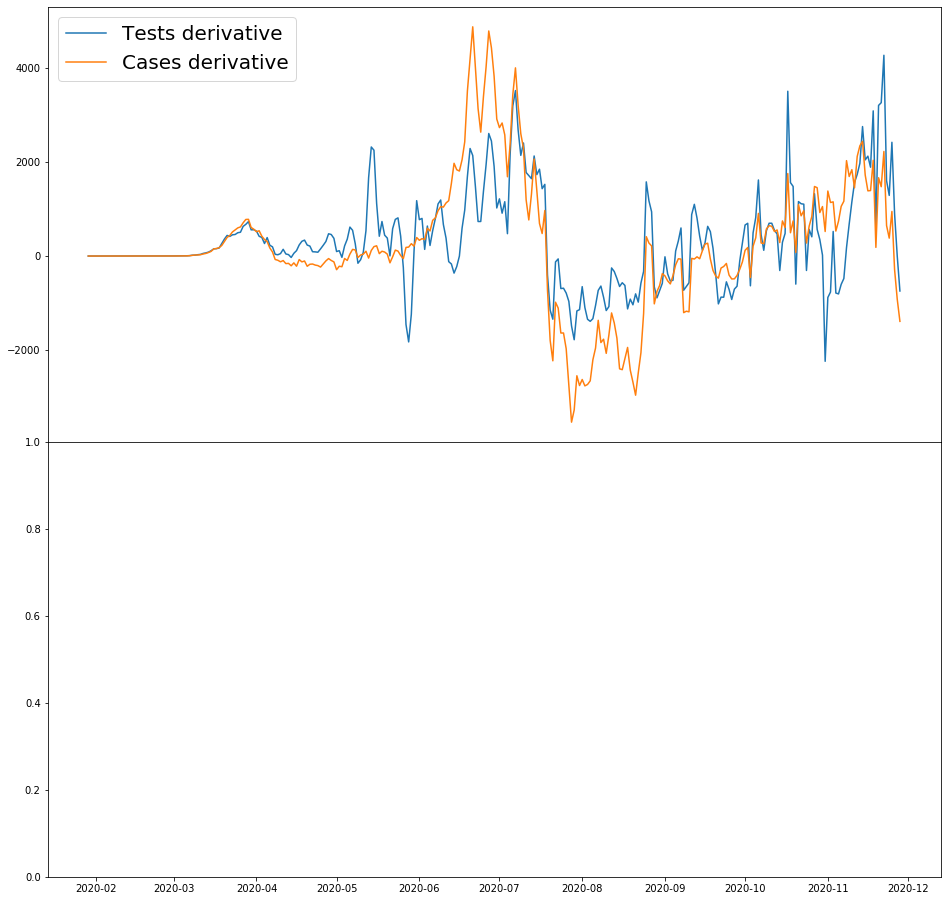

In [301]:
fig, axs = plt.subplots(figsize=(16,16), nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

k = data.query('state=="FL"')
# axs[0].plot(k.totalTestResultsIncrease, label='Tests')
# axs[0].plot(k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean(), c='C0')
axs[0].plot(k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean().diff().rolling(min_periods=1, center=True, window=3).mean(), c='C0', label='Tests derivative')


# axs[0].plot(k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Cases', c='C1')
axs[0].plot(10* k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean().diff().rolling(min_periods=1, center=True, window=3).mean(), c='C1', label='Cases derivative')


# axs[0].plot(k.positiveIncrease, c='C1')
# axs[0].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Deaths',c='C3')

axs[0].legend(fontsize=20)
# axs[0].set_yscale('log')
# axs[0].set_ylim(bottom=1)
# axs[0].tick_params(labelsize=20)

# axs[1].plot(k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.totalTestResultsIncrease.rolling(min_periods=1, center=True, window=14).mean()[35:], label='Raw positivity')
# axs[1].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean(), label='Raw CFR')
# # axs[1].plot(k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean() / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean().shift(21)[75:], label='Shifted CFR')
# axs[1].plot((k.deathIncrease.rolling(min_periods=1, center=True, window=14).mean().shift(-21) / k.positiveIncrease.rolling(min_periods=1, center=True, window=14).mean())[55:], label='Shifted CFR by death date')

# axs[1].legend(fontsize=20)
# axs[1].tick_params(labelsize=20)
# axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))



# Simulation

In [7]:
# Non-covid severe
k1 = 5000
# Non-covid mild
k2 = 500000

class Day:
    def __init__(self, time=0, K1=500, K2=50000, f1=0.2):
        self.time = time
        self.K1 = K1
        self.K2 = K2
        
    def display(self):
        return
    
day = Day()


In [29]:
class Day:
    def __init__(self, time=0, k1=500, k2=50000, c1=0, c2=0, f1=0.2, test=10000):
        self.data = pd.DataFrame(columns=['k1','k2','c1','c2','pos','test'])
        self.k1 = k1
        self.k2 = k2
        self.c1 = c1
        self.c2 = c2
        self.test = test 
        self.pos = self.c1 + self.fest()
        
                
        
        self.data = self.data.append({'k1':self.k1,
                                      'k2':self.k2,
                                      'c1':self.c1,
                                      'c2':self.c2,
                                      'test':self.test,
                                      'pos':self.pos
                                      
                                     }, ignore_index=True)
        self.data = self.data.fillna(0).astype(int)
        
    def fest(self):
        f2 = self.c2 / (self.c2 + self.k2)
        test_mild = self.test - self.k1 - self.c1
        test_mild_covid = int(test_mild * f2)
        return test_mild_covid
    
day = Day(c1=100, c2=500, test=10000)
day.data

,k1,k2,c1,c2,pos,test
0,500,50000,100,500,193,10000


In [38]:
def func(f1, f2, p):
    return (1 - f2/p) / (f1*(1-f2))


func(0.1,0.2,0.25)

2.499999999999999

In [53]:
sample = np.random.lognormal(1.63, 0.5, size=100000)
# np.percentile(sample, 90)
sample[sample<14].size/sample.size

0.97849

$\displaystyle{}\text{Let } f_1 = \frac{C_1}{C_0}, \text{aka, severe ratio of COVID}\\
\displaystyle{}\text{Let } f_2 = \frac{C_2}{C_2+K_2}, \text{aka, COVID ratio in mild cases}\\
\displaystyle{}\text{Let } p=\frac{C}{T}, \text{aka test positivity}$

starting from the first line of equation (4) in your PDF  

$C=C_1+T_2 f_2  \\
= C_0f_1+T_2 f_2 \\
=C_0f_1+(T-C_1-K_1) f_2 \\
=C_0f_1+Tf_2-C_0f_1f_2-K_1f_2 \\
=C_0f_1(1-f_2)+f_2(T-K1)\\
\text{since we can assume T>>K1}\\
\approx C_0f_1(1-f_2)+f_2T$

$
C\approx C_0f_1(1-f_2)+f_2T\\
\implies C\approx C_0f_1(1-f_2)+f_2\frac{C}{p}\\
\implies C(1-\frac{f_2}{p})\approx C_0f_1(1-f_2)\\
\displaystyle{}\text{Let } x=\frac{C_0}{C} \text{aka, how many times are the true infection to confirmed cases, the value we want to know} \\
\displaystyle{}\implies \frac{C_0}{C}=x=\frac{p-f_2}{pf_1(1-f_2)}
$

$
\displaystyle \frac{C(t)}{\tilde{p}_1+\tilde{r}_1T(t)}=C_0(t) \\
\implies \displaystyle \tilde{r}_1=\frac{C(t)/C_0(t)-\tilde{p}_1}{T(t)} \\
\text{Let } t_{max} \text{ be the amount of tests required to capture all cases so that } C(t)=C0(t) \\
\implies \displaystyle \tilde{r}_1=\frac{1-\tilde{p}_1}{t_{max}}
$

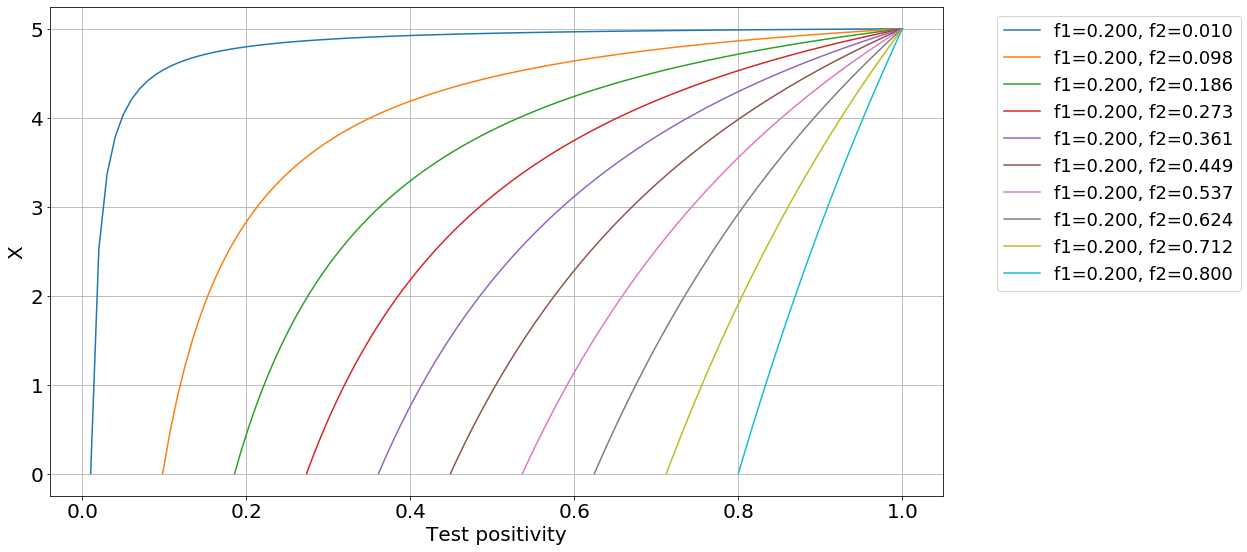

In [74]:
fig, ax = plt.subplots(figsize=(16,9))

f1 = 0.20

for f2 in np.linspace(0.01, 0.8, 10):
    p = np.linspace(f2, 1, 100)
    ax.plot(p, func(f1, f2, p), label='f1=%.3f, f2=%.3f'%(f1,f2))
    ax.legend(fontsize=18, bbox_to_anchor=(1.05, 1))

    
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Test positivity', fontsize=20)
ax.set_ylabel('X', fontsize=20)
ax.tick_params(labelsize=20)
ax.grid()


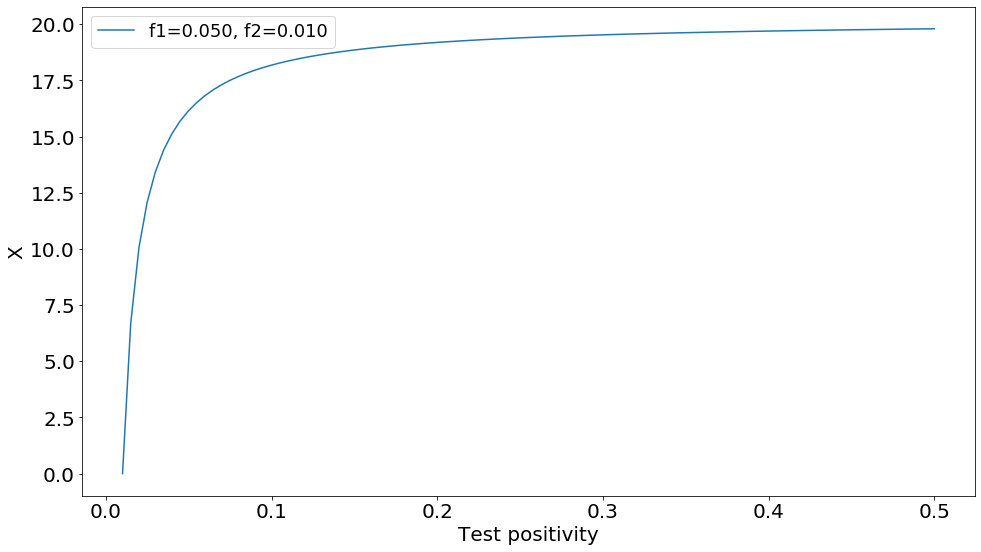

In [68]:
fig, ax = plt.subplots(figsize=(16,9))

f1 = 0.05
f2 = 0.01
p = np.linspace(f2, 0.5, 100)

ax.plot(p, func(f1, f2, p), label='f1=%.3f, f2=%.3f'%(f1,f2))
ax.legend(fontsize=18)
# ax.set_xscale('log')
# ax.set_yscale('log')


ax.set_xlabel('Test positivity', fontsize=20)
ax.set_ylabel('X', fontsize=20)
ax.tick_params(labelsize=20)


In [4]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
# df.iloc[0]['date']

focus_state='TX'
focus = df[df['state']==focus_state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')

                                
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

# ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
# ax.bar(x=focus.index, height=focus['positiveIncrease'],label='Daily new positives in '+focus_state)
# ax.legend(fontsize=20, loc=2)

# ax2 = ax.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Cumulative Positive rate', color=color, fontsize=18)
# ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='lime', label='Daily positive rate')
# ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color, label='Total positive rate')
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.tick_params(labelsize=20)
# ax2.tick_params(labelsize=20)
# ax2.legend(loc='upper right', fontsize=20)
# ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# plt.tight_layout()
# plt.savefig(r'figures/%s_pos_rate.png'%(focus_state + date), dpi=100)

In [88]:
c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()

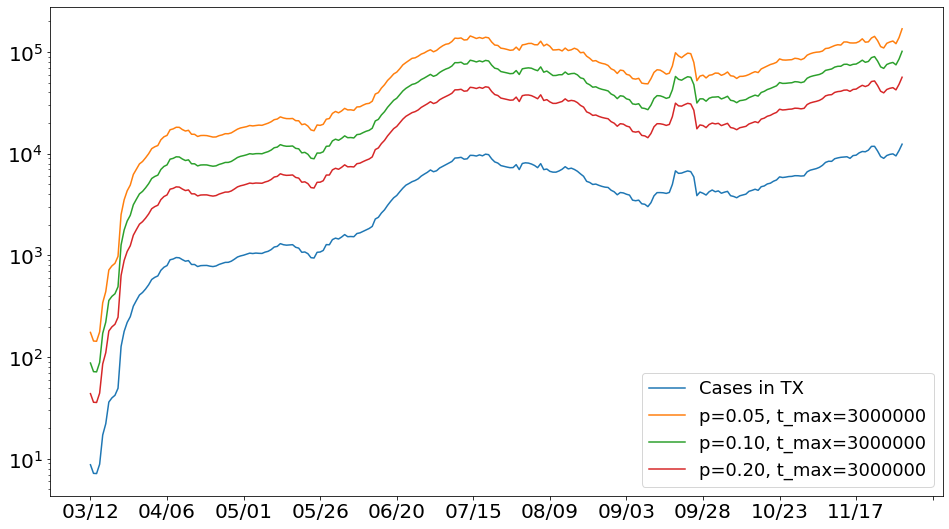

In [123]:
t_max = 3e6
# p = 0.05


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(c, label='Cases in TX')
for p in [0.05, 0.1, 0.2]:
    c_0 = c / (p + (1-p)*t/t_max)
    ax.plot(c_0, label='p=%.2f, t_max=%d'%(p, t_max) )

ax.legend(fontsize=18)
ax.tick_params(labelsize=20)
ax.set_yscale('log')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

(0, 20.949904240436663)

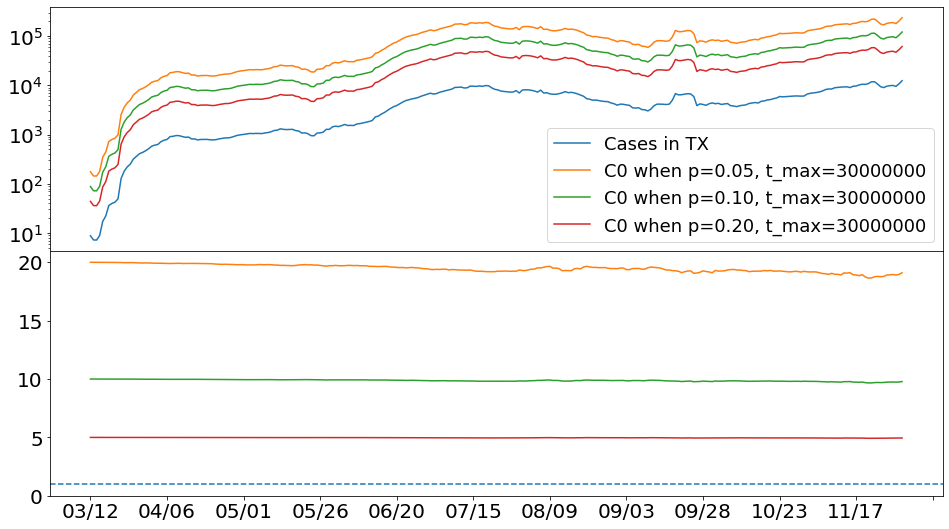

In [141]:
t_max = 114190

fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].plot(c, label='Cases in TX')
for i,p in enumerate([0.05, 0.1, 0.2]):
    c_0 = c / (p + (1-p)*t/t_max)
    axs[0].plot(c_0, label='C0 when p=%.2f, t_max=%d'%(p, t_max), c='C'+str(i+1))
    axs[1].plot(c_0/c, label='C0/C when p=%.2f, t_max=%d'%(p, t_max), c='C'+str(i+1))

axs[1].axhline(y=1, ls='--')
    
axs[0].legend(fontsize=18)
axs[0].tick_params(labelsize=20)
axs[0].set_yscale('log')
axs[0].xaxis.set_major_locator(plt.MaxNLocator(12))
# axs[1].legend(fontsize=18)
axs[1].tick_params(labelsize=20)
# axs[1].set_yscale('log')
axs[1].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[1].set_ylim(bottom=0)

In [347]:
us_state_abbrev

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 '

In [25]:
# https://www.infoplease.com/us/states/state-population-by-rank
us_pop = pd.read_clipboard(thousands=',', header=None).set_index(1)[2].drop('DC')
us_pop.rename(lambda x:us_state_abbrev[x.strip()], inplace=True)

In [377]:
for state in us_pop.index:
    if state in df.state.unique():    
        focus = df[df['state']==state].set_index('date').sort_index().iloc[8:]
        focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
        focus.index = focus.time.dt.strftime('%m/%d')
        c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
        t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

        sns.color_palette("rocket")
        # ax.scatter(x=(c/c.shift(1)).clip(lower=0.5, upper=2),y=(t/t.shift(1)).clip(lower=0.5, upper=2), s=np.power(np.linspace(2,20,c.size), 1.5), alpha=0.5)
        sns.scatterplot(x=t,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
        ax.plot(t,c/us_pop[state]*1e6, alpha=0.2)
        # ax.plot((c/c.shift(1)).clip(lower=0.5, upper=2),(t/t.shift(1)).clip(lower=0.5, upper=2), '-', alpha=0.1)
        # ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='gray', alpha=0.3)
        # ax.plot(np.arange(1,1e5), 10*np.arange(1,1e5), c='gray', alpha=0.3)
        # ax.axvline(x=0, alpha=0.3, c='gray')
        # ax.axhline(y=0, alpha=0.3, c='gray')

        ax.set_title(state, fontsize=24)
        ax.get_legend().remove()
        # ax.legend(fontsize=18)
        ax.tick_params(labelsize=20)
        # ax.set_xscale('log')
        # ax.set_yscale('log')
        # ax.set_xlim(left=10, right=1e5)
        # ax.set_ylim(bottom=10, top=1e5)
        # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        # ax.xaxis.set_major_locator(plt.MaxNLocator(12))
        ax.set_xlabel('Daily tests/1M pop', fontsize=20)
        ax.set_ylabel('Daily cases', fontsize=20)
        plt.tight_layout()
        plt.savefig(r'figures/special/US_state_test_pop/1_%s_1Mpop.png'%state, dpi=100)
        plt.close()

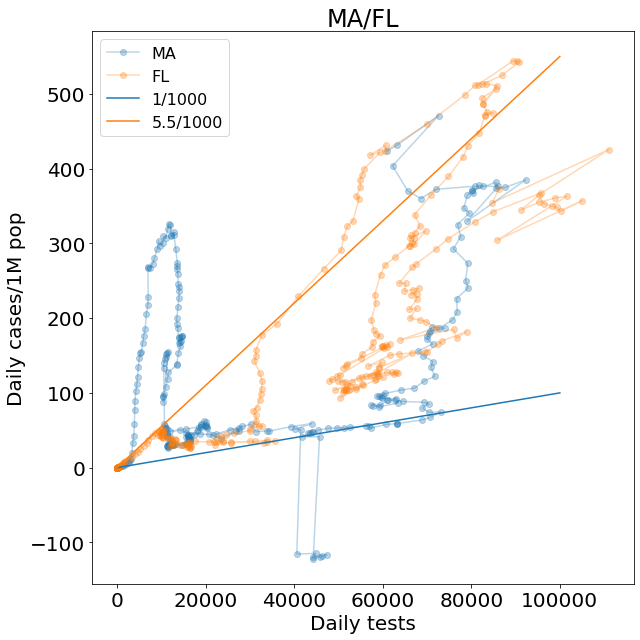

In [442]:
def compare_states(state1, state2):
    focus_state=state1
    focus = df[df['state']==focus_state].set_index('date').sort_index().iloc[8:]
    c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
    t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
    
#     sns.color_palette("rocket")
#     sns.scatterplot(x=t,y=c/us_pop[focus_state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
    ax.plot(t,c/us_pop[focus_state]*1e6, 'o-', c='C0',alpha=0.3, label=focus_state)
    
    focus_state=state2
    focus = df[df['state']==focus_state].set_index('date').sort_index().iloc[8:]
    c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
    t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()

    sns.color_palette("magma")
#     sns.scatterplot(x=t,y=c/us_pop[focus_state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='magma', alpha=1, ax=ax)
    ax.plot(t,c/us_pop[focus_state]*1e6, 'o-', c='C1',alpha=0.3, label=focus_state)
    
    ax.plot([0,100000],[0,100], c='C0', label='1/1000')
    ax.plot([0,100000],[0,550], c='C1', label='5.5/1000')
      
    ax.set_title(state1+'/'+state2, fontsize=24)
    ax.legend(fontsize=16)
    ax.tick_params(labelsize=20)
    ax.set_xlabel('Daily tests', fontsize=20)
    ax.set_ylabel('Daily cases/1M pop', fontsize=20)
    plt.tight_layout()

compare_states('MA','FL')

    
    

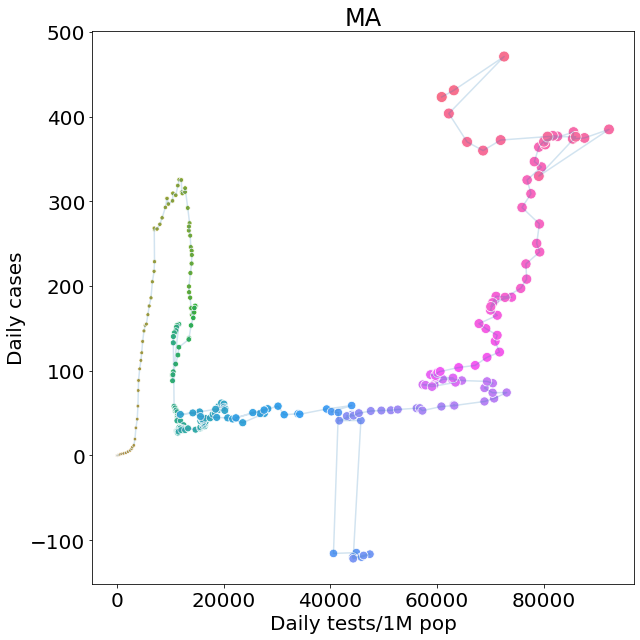

In [450]:
state = 'MA'
focus = df[df['state']==state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

sns.color_palette("rocket")
# ax.scatter(x=(c/c.shift(1)).clip(lower=0.5, upper=2),y=(t/t.shift(1)).clip(lower=0.5, upper=2), s=np.power(np.linspace(2,20,c.size), 1.5), alpha=0.5)
sns.scatterplot(x=t,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
ax.plot(t,c/us_pop[state]*1e6, alpha=0.2)
# ax.plot((c/c.shift(1)).clip(lower=0.5, upper=2),(t/t.shift(1)).clip(lower=0.5, upper=2), '-', alpha=0.1)
# ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='gray', alpha=0.3)
# ax.plot(np.arange(1,1e5), 10*np.arange(1,1e5), c='gray', alpha=0.3)
# ax.axvline(x=0, alpha=0.3, c='gray')
# ax.axhline(y=0, alpha=0.3, c='gray')

ax.set_title(state, fontsize=24)
ax.get_legend().remove()
ax.tick_params(labelsize=20)

ax.set_xlabel('Daily tests/1M pop', fontsize=20)
ax.set_ylabel('Daily cases', fontsize=20)
plt.tight_layout()
# plt.savefig(r'figures/special/US_state_test_pop/1_%s_1Mpop.png'%state, dpi=100)
# plt.close()

No handles with labels found to put in legend.


Text(0, 0.5, 'Test increase ratio')

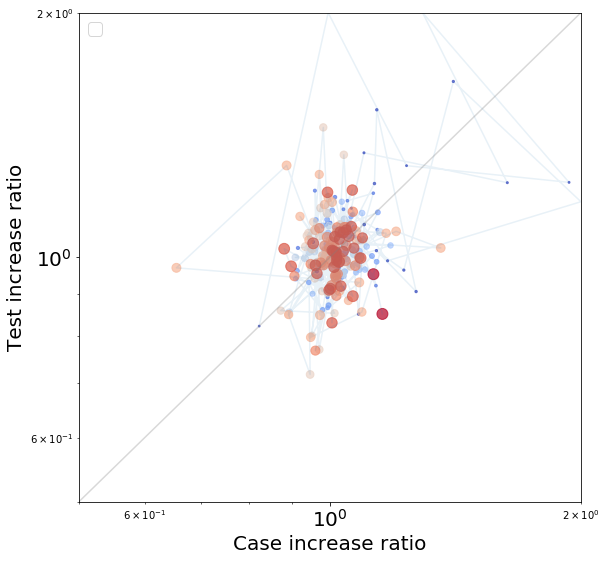

In [242]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

# sns.color_palette("rocket")
# ax.scatter(x=(c/c.shift(1)).clip(lower=0.5, upper=2),y=(t/t.shift(1)).clip(lower=0.5, upper=2), s=np.power(np.linspace(2,20,c.size), 1.5), alpha=0.5)
ax.scatter(x=(c/c.shift(1)),y=(t/t.shift(1)), s=np.power(np.linspace(2,20,c.size), 1.6), c=[int(i[:2])-3 for i in c.index], cmap='coolwarm', alpha=0.7)
# sns.scatterplot(x=(c/c.shift(1)).values,y=(t/t.shift(1)).values, s=np.power(np.linspace(2,20,c.size), 1.6), hue=[int(i[:2]) for i in c.index],  alpha=1)
ax.plot((c/c.shift(1)).clip(lower=0.5, upper=2),(t/t.shift(1)).clip(lower=0.5, upper=2), '-', alpha=0.1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='gray', alpha=0.3)

# ax.get_legend().remove()
ax.legend(fontsize=18)
ax.tick_params(labelsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(left=0.5, right=2)
ax.set_ylim(bottom=0.5, top=2)
# ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_xlabel('Case increase ratio', fontsize=20)
ax.set_ylabel('Test increase ratio', fontsize=20)

No handles with labels found to put in legend.


Text(0, 0.5, 'Cumulative tests')

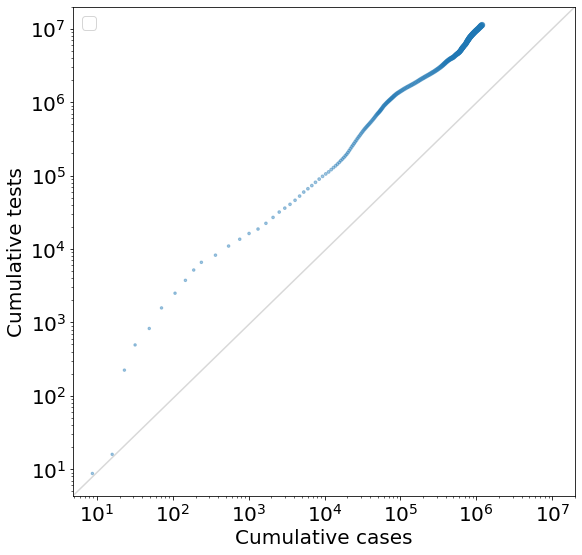

In [243]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

ax.scatter(x=np.cumsum(c),y=np.cumsum(t), s=np.power(np.linspace(5,20,c.size), 1.1), alpha=0.4)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='gray', alpha=0.3)
# sns.scatterplot(x=c/c.shift(1), y=t/t.shift(1), hue=c.index)

ax.legend(fontsize=18)
ax.tick_params(labelsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(right=2e7)
ax.set_ylim(top=2e7)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
# ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_xlabel('Cumulative cases', fontsize=20)
ax.set_ylabel('Cumulative tests', fontsize=20)

No handles with labels found to put in legend.


Text(0, 0.5, 'Cumulative tests')

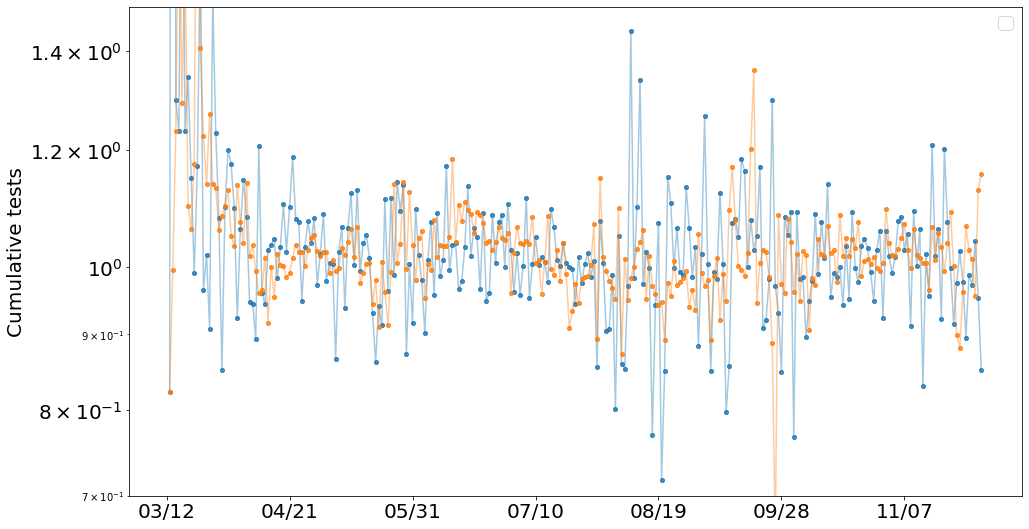

In [267]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(t/t.shift(1), 'o-', alpha=0.4, markersize=4, c='C0')
ax.plot(t/t.shift(1), 'o', markersize=4, alpha=0.7, c='C0')
ax.plot(c/c.shift(1), 'o-', alpha=0.4, markersize=4, c='C1')
ax.plot(c/c.shift(1), 'o', markersize=4, alpha=0.7, c='C1')


ax.legend(fontsize=18)
ax.tick_params(labelsize=20)
# ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(right=2e7)
ax.set_ylim(top=1.5, bottom=0.7)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

ax.set_ylabel('Cumulative tests', fontsize=20)

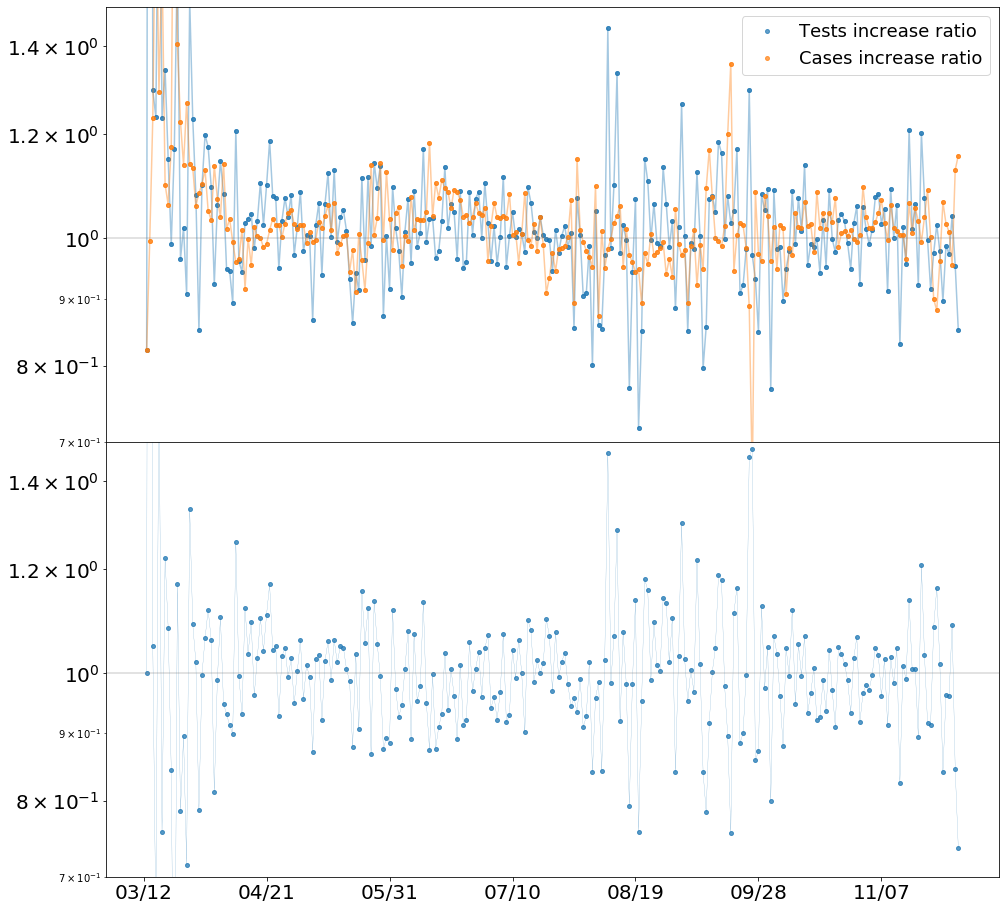

In [283]:
fig, axs = plt.subplots(figsize=(16,16), nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].plot(t/t.shift(1), 'o-', alpha=0.4, markersize=4, c='C0')
axs[0].plot(t/t.shift(1), 'o', markersize=4, alpha=0.7, c='C0', label='Tests increase ratio')
axs[0].plot(c/c.shift(1), 'o-', alpha=0.4, markersize=4, c='C1')
axs[0].plot(c/c.shift(1), 'o', markersize=4, alpha=0.7, c='C1', label='Cases increase ratio')
axs[0].axhline(y=1, c='gray', alpha=0.3)

axs[1].plot((t/t.shift(1))/(c/c.shift(1)), 'o-', alpha=0.75, lw=0.2, markersize=4, c='C0')
axs[1].axhline(y=1, c='gray', alpha=0.3, label='Test increase to case increase')



axs[0].legend(fontsize=18)
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)
# ax.set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_ylim(top=1.5, bottom=0.7)
axs[1].set_ylim(top=1.5, bottom=0.7)

axs[0].xaxis.set_major_locator(plt.MaxNLocator(9))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(4))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(9))
axs[1].yaxis.set_major_locator(plt.MaxNLocator(4))


# ax.set_ylabel('Cumulative tests', fontsize=20)

In [543]:
df.state.unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

## x=test, y=case/pop

Text(0, 0.5, 'Daily cases/1M pop')

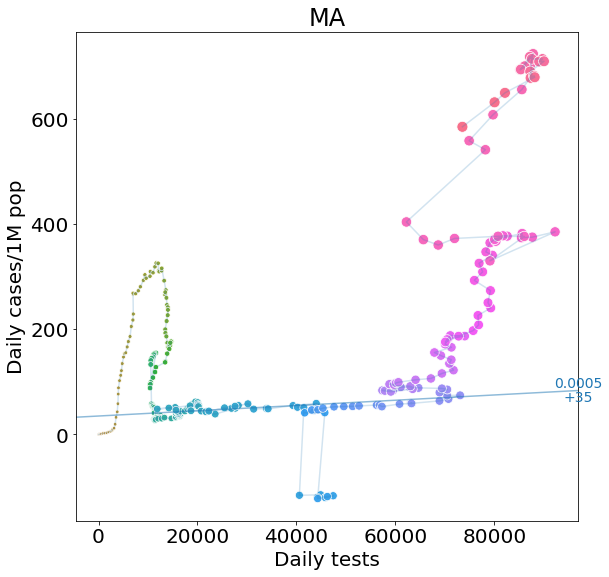

In [185]:
state = 'MA'
focus = df[df['state']==state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

sns.color_palette("rocket")
# ax.scatter(x=(c/c.shift(1)).clip(lower=0.5, upper=2),y=(t/t.shift(1)).clip(lower=0.5, upper=2), s=np.power(np.linspace(2,20,c.size), 1.5), alpha=0.5)
sns.scatterplot(x=t,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
ax.plot(t,c/us_pop[state]*1e6, alpha=0.2)

def add_line(slope, inter, color, ax=ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_ = np.linspace(xlim[0],xlim[1],2)
    y_ = slope*x_ + inter
    plt.plot([x_[0], x_[1]], [y_[0], y_[1]], c=color, alpha=0.5)
    ax.annotate(slope, xy=(x_[1],y_[1]), ha='center', va='bottom', fontsize=14, c=color)
    ax.annotate('+'+str(inter), xy=(x_[1],y_[1]), ha='center', va='top', fontsize=14, c=color)
    if y_[1] > ylim[1]:
        r_ = ylim[1] / y_[1] * 0.95
        ax.annotate(slope, xy=(x_[1]*r_,y_[1]*r_), ha='center', va='bottom', fontsize=14, c=color)
        ax.annotate('+'+str(inter), xy=(x_[1]*r_,y_[1]*r_), ha='center', va='top', fontsize=14, c=color)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
add_line(20/40000, 35, 'C0')
# add_line(700/25000, -1000, 'C1')
# add_line(20/40000, 70, 'C2')


ax.set_title(state, fontsize=24)
ax.get_legend().remove()
ax.tick_params(labelsize=20)


ax.set_xlabel('Daily tests', fontsize=20)
ax.set_ylabel('Daily cases/1M pop', fontsize=20)
# plt.tight_layout()
# plt.savefig(r'figures/special/US_state_test_pop/2_fitted%s.png'%state, dpi=100)
# plt.close()

## x=test, y=positivity

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


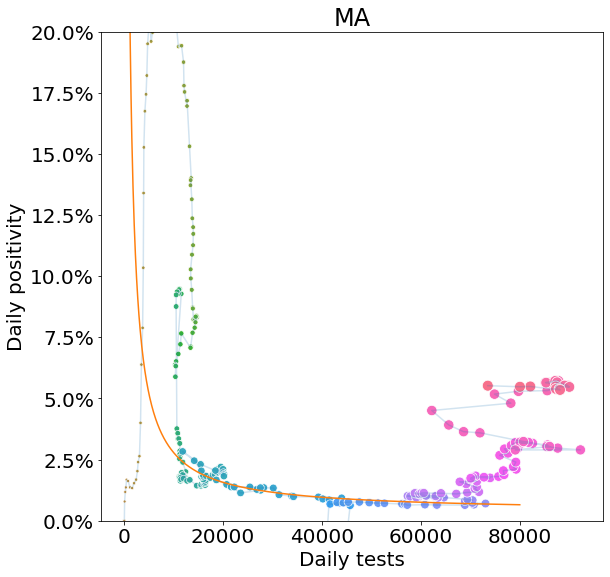

In [194]:
state = 'MA'
focus = df[df['state']==state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()
p = c/t

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

sns.color_palette("rocket")

# sns.scatterplot(x=t,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
# ax.plot(t,c/us_pop[state]*1e6, alpha=0.2)

sns.scatterplot(x=t,y=c/t*100, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
ax.plot(t,c/t*100, alpha=0.2)


def add_line(slope, inter, color, ax=ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_ = np.linspace(xlim[0],xlim[1],2)
    y_ = slope*x_ + inter
    plt.plot([x_[0], x_[1]], [y_[0], y_[1]], c=color, alpha=0.5)
    ax.annotate(slope, xy=(x_[1],y_[1]), ha='center', va='bottom', fontsize=14, c=color)
    ax.annotate('+'+str(inter), xy=(x_[1],y_[1]), ha='center', va='top', fontsize=14, c=color)
    if y_[1] > ylim[1]:
        r_ = ylim[1] / y_[1] * 0.95
        ax.annotate(slope, xy=(x_[1]*r_,y_[1]*r_), ha='center', va='bottom', fontsize=14, c=color)
        ax.annotate('+'+str(inter), xy=(x_[1]*r_,y_[1]*r_), ha='center', va='top', fontsize=14, c=color)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
# add_line(20/40000, 35, 'C0')
# add_line(700/25000, -1000, 'C1')
# add_line(20/40000, 70, 'C2')

x_ = np.linspace(0, 80000, 1000)
y_ = (245/x_ + 0.0035) * 100
ax.plot(x_, y_)

ax.set_title(state, fontsize=24)
ax.get_legend().remove()
ax.tick_params(labelsize=20)
ax.set_ylim(top=20,bottom=0)

ax.set_xlabel('Daily tests', fontsize=20)
ax.set_ylabel('Daily positivity', fontsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.tight_layout()
# plt.savefig(r'figures/special/US_state_test_pop/2_fitted%s.png'%state, dpi=100)
# plt.close()

## x=positivity, y=case/pop

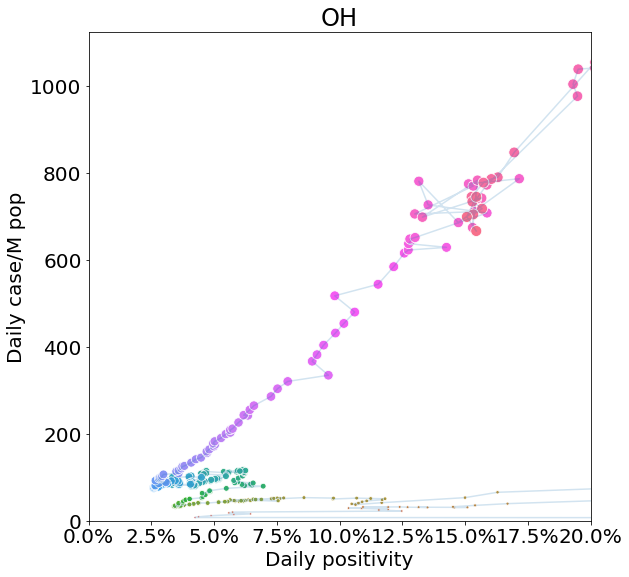

In [182]:
state = 'OH'
focus = df[df['state']==state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()
p = c/t

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

sns.color_palette("rocket")

sns.scatterplot(x=c/t*100,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=ax)
ax.plot(c/t*100,c/us_pop[state]*1e6, alpha=0.2)



def add_line(slope, inter, color, ax=ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_ = np.linspace(xlim[0],xlim[1],2)
    y_ = slope*x_ + inter
    plt.plot([x_[0], x_[1]], [y_[0], y_[1]], c=color, alpha=0.5)
    ax.annotate(slope, xy=(x_[1],y_[1]), ha='center', va='bottom', fontsize=14, c=color)
    ax.annotate('+'+str(inter), xy=(x_[1],y_[1]), ha='center', va='top', fontsize=14, c=color)
    if y_[1] > ylim[1]:
        r_ = ylim[1] / y_[1] * 0.95
        ax.annotate(slope, xy=(x_[1]*r_,y_[1]*r_), ha='center', va='bottom', fontsize=14, c=color)
        ax.annotate('+'+str(inter), xy=(x_[1]*r_,y_[1]*r_), ha='center', va='top', fontsize=14, c=color)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
# add_line(20/40000, 35, 'C0')
# add_line(700/25000, -1000, 'C1')
# add_line(20/40000, 70, 'C2')


ax.set_title(state, fontsize=24)
ax.get_legend().remove()
ax.tick_params(labelsize=20)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0, right=20)

ax.set_xlabel('Daily positivity', fontsize=20)
ax.set_ylabel('Daily case/M pop', fontsize=20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
# plt.tight_layout()
# plt.savefig(r'figures/special/US_state_test_pop/2_fitted%s.png'%state, dpi=100)
# plt.close()

## All in one

In [89]:
for i in range(4):
    print(axs[i])

AxesSubplot(0.125,0.5025;0.3875x0.3775)
AxesSubplot(0.5125,0.5025;0.3875x0.3775)
AxesSubplot(0.125,0.125;0.3875x0.3775)
AxesSubplot(0.5125,0.125;0.3875x0.3775)


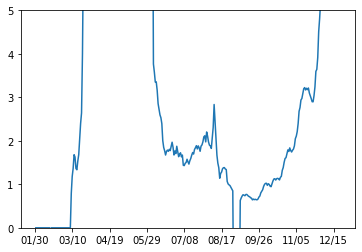

In [137]:
fig, ax = plt.subplots()
ax.plot(p)
ax.set_ylim(bottom=0, top=5)
ax.xaxis.set_major_locator(plt.MaxNLocator(9))

In [192]:
# def add_line(slope, inter, color, ax):
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
#     x_ = np.linspace(xlim[0],xlim[1],2)
#     y_ = slope*x_ + inter
#     plt.plot([x_[0], x_[1]], [y_[0], y_[1]], c=color, alpha=0.5)
#     ax.annotate(slope, xy=(x_[1],y_[1]), ha='center', va='bottom', fontsize=14, c=color)
#     ax.annotate('+'+str(inter), xy=(x_[1],y_[1]), ha='center', va='top', fontsize=14, c=color)
#     if y_[1] > ylim[1]:
#         r_ = ylim[1] / y_[1] * 0.95
#         ax.annotate(slope, xy=(x_[1]*r_,y_[1]*r_), ha='center', va='bottom', fontsize=14, c=color)
#         ax.annotate('+'+str(inter), xy=(x_[1]*r_,y_[1]*r_), ha='center', va='top', fontsize=14, c=color)
#     ax.set_xlim(xlim)
# #     ax.set_ylim(ylim)

AttributeError: 'NoneType' object has no attribute 'remove'

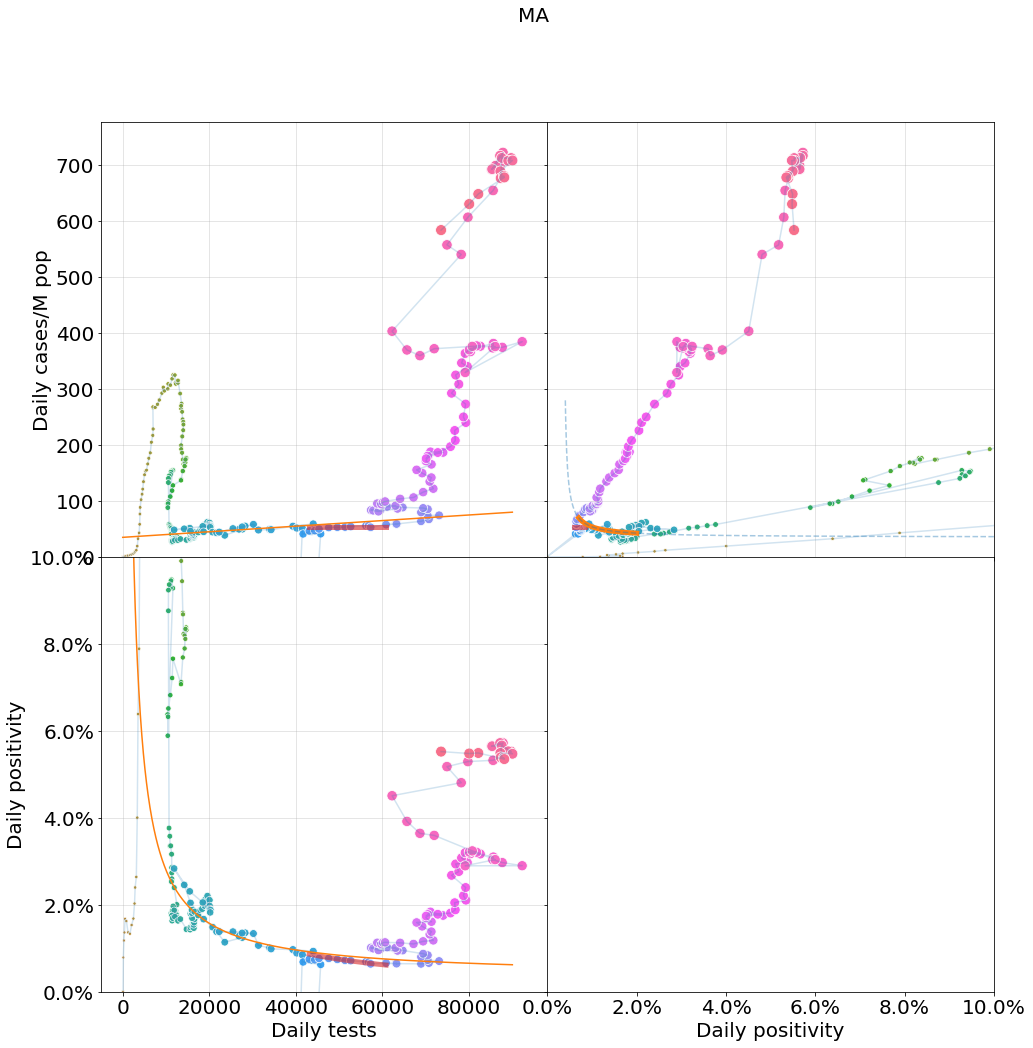

In [380]:
# variables
state = 'MA'
pos_min = 0
pos_max = 10


# data
focus = df[df['state']==state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
c = focus['positiveIncrease'].rolling(min_periods=1, center=True, window=7).mean().copy()
t = focus['totalTestResultsIncrease'].clip(lower=0).rolling(min_periods=1, center=True, window=7).mean().copy()
p = c/t*100

# fig structure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16), sharex='col', sharey='row')
axs = axs.ravel()
fig.suptitle(state, fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)

# axs0
sns.scatterplot(x=t,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=axs[0])
axs[0].plot(t,c/us_pop[state]*1e6, alpha=0.2)

# axs[0].plot([t[243:252].min(), t[243:252].max()], [600/us_pop[state]*1e6, 600/us_pop[state]*1e6], c='C3', lw=5, alpha=0.6)
axs[0].plot([t[222:235].min(), t[222:235].max()], [374/us_pop[state]*1e6, 374/us_pop[state]*1e6], c='C3', lw=5, alpha=0.6)

# axs1
sns.scatterplot(x=p,y=c/us_pop[state]*1e6, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=axs[1])
axs[1].plot(p,c/us_pop[state]*1e6, alpha=0.2)

axs[1].plot([yy_.min(), yy_.max()], [374/us_pop[state]*1e6, 374/us_pop[state]*1e6], c='C3', lw=5, alpha=0.6)

# axs2
sns.scatterplot(x=t,y=p, s=np.power(np.linspace(2,20,c.size), 1.6), hue=c.index, cmap='rocket', alpha=1, ax=axs[2])
axs[2].plot(t,p, alpha=0.2)

xx_ = np.linspace(t[222:235].min(), t[222:235].max(), 100)
yy_ = 100*374/xx_
axs[2].plot(xx_,yy_, c='C3', lw=5, alpha=0.6)

# add lines
x_ = np.linspace(1, 90000, 1000)
y_0 = (0.0035*x_ + 245)/7
y_2 = (245/x_ + 0.0035) * 100
axs[0].plot(x_, y_0)
axs[2].plot(x_, y_2)

x_1 = np.linspace(0.7, 2, 1000)
y_1 = (245 + 245*0.0035/(x_1/100-0.0035))/7
axs[1].plot(x_1, y_1, lw=5, c='C1')
x_1 = np.linspace(0.4, 10, 1000)
y_1 = (245 + 245*0.0035/(x_1/100-0.0035))/7
axs[1].plot(x_1, y_1, '--', c='C0', alpha=0.4)

# axes control
axs[0].set_ylabel('Daily cases/M pop', fontsize=20)
axs[2].set_xlabel('Daily tests', fontsize=20)
axs[2].set_ylabel('Daily positivity', fontsize=20)
axs[3].set_xlabel('Daily positivity', fontsize=20)
axs[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter())

axs[0].set_ylim(bottom=0)
axs[1].set_xlim(pos_min, pos_max)
axs[2].set_ylim(pos_min, pos_max)

for i in range(4):
    axs[i].tick_params(labelsize=20)
    axs[i].get_legend().remove()
    axs[i].grid(alpha=0.4)
    
fig.tight_layout()
fig.subplots_adjust(top=0.2)
# axs[0].get_legend().remove()

Text(0.5, 1.0, 'C/C0=0.100000')

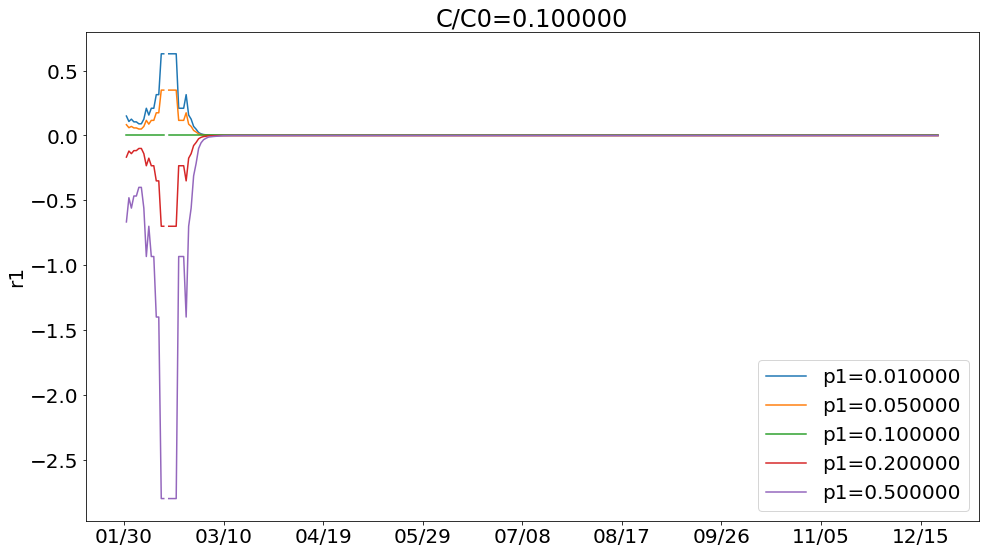

In [177]:
p_p0 = 1/10
# p1 = 0.05


fig, ax = plt.subplots(figsize=(16,9))

for p1 in [0.01, 0.05, 0.1, 0.2, 0.5]:
    r1 = (p_p0 - p1) / t
    ax.plot(r1, label='p1=%f'%p1)

# ax.set_ylim(top=0.0001, bottom=0)
ax.legend(fontsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
ax.tick_params(labelsize=20)
ax.set_ylabel('r1', fontsize=20)
ax.set_title('C/C0=%2f'%p_p0, fontsize=24)

In [368]:
c[222:237]

time
09/08    318.285714
09/09    334.857143
09/10    323.428571
09/11    327.000000
09/12    347.285714
09/13    365.142857
09/14    368.857143
09/15    370.857143
09/16    377.285714
09/17    387.714286
09/18    388.000000
09/19    368.000000
09/20    401.857143
09/21    409.285714
09/22    414.142857
Name: positiveIncrease, dtype: float64

In [373]:
c[222:235].mean()

359.8901098901099

In [238]:
p_ = 245
r_ = 0.0035

(0, 500.42551020408206)

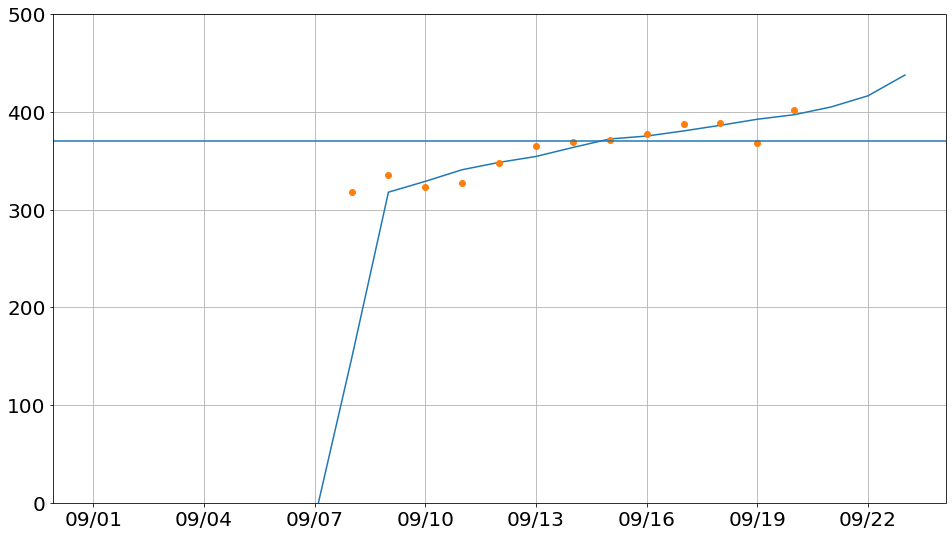

In [381]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(c.rolling(min_periods=1, center=True, window=7).mean()[215:238])
ax.plot(c[222:235], 'o')
ax.axhline(y=370)
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
ax.tick_params(labelsize=20)
ax.grid()
ax.set_ylim(bottom=0)

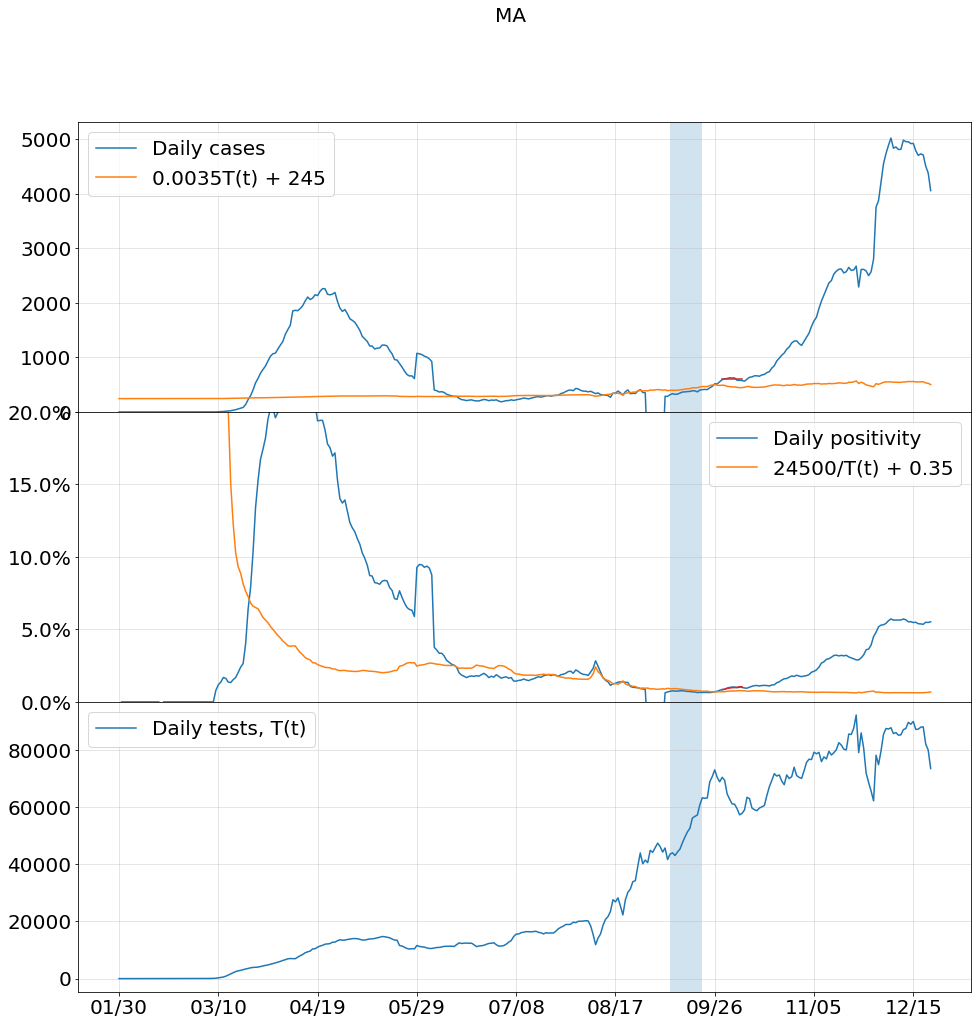

In [376]:

# fig structure
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16,16), sharex='col', sharey='row')
axs = axs.ravel()
fig.suptitle(state, fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)

# # axs0
axs[0].plot(c, label='Daily cases')
# x_ = np.linspace(1, 90000, 1000)
# y_0 = (0.0035*t + 245)
axs[0].plot(c.index, r_*t+p_, label='0.0035T(t) + 245')

x_ = c.index[243:252]
y_ = np.ones(len(x_))*600
axs[0].plot(x_, y_, c='C3')
# axs[0].axhline(y=600, c='C2')
# axs[0].axhline(y=600, xmin=243, xmax=282, lw=20, c='C3')

# # axs1
axs[1].plot(p, label='Daily positivity')
axs[1].plot(c.index, 100*(p_/t+r_), label='24500/T(t) + 0.35')

x_ = c.index[243:252]
y_ = 100*600/t[243:252]
axs[1].plot(x_, y_, c='C3')


# # axs2
axs[2].plot(t, label='Daily tests, T(t)')
axs[0].axvspan(xmin=222, xmax=235, alpha=0.2, )
axs[1].axvspan(xmin=222, xmax=235, alpha=0.2, )
axs[2].axvspan(xmin=222, xmax=235, alpha=0.2, )

# # add lines

# y_2 = (245/x_ + 0.0035) * 100
# axs[0].plot(x_, y_0)
# axs[2].plot(x_, y_2)

# x_1 = np.linspace(0.7, 2, 1000)
# y_1 = (245 + 245*0.0035/(x_1/100-0.0035))/7
# axs[1].plot(x_1, y_1, lw=5, c='C1')
# x_1 = np.linspace(0.4, 10, 1000)
# y_1 = (245 + 245*0.0035/(x_1/100-0.0035))/7
# axs[1].plot(x_1, y_1, '--', c='C0', alpha=0.4)

# axes control
# axs[0].set_ylabel('Daily cases', fontsize=20)
# axs[1].set_ylabel('Daily positivity', fontsize=20)
# axs[2].set_ylabel('Daily tests', fontsize=20)
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[2].xaxis.set_major_locator(plt.MaxNLocator(9))


axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0, top=20)
# axs[2].set_ylim(pos_min, pos_max)

for i in range(3):
    axs[i].tick_params(labelsize=20)
#     axs[i].get_legend().remove()
    axs[i].legend(fontsize=20)
    axs[i].grid(alpha=0.4)
    
# fig.tight_layout()
# fig.subplots_adjust(top=0.2)
# # axs[0].get_legend().remove()

$\displaystyle{}\text{Let } f_1 = \frac{C_1}{C_0}, \text{aka, severe ratio of COVID}\\
\displaystyle{}\text{Let } f_2 = \frac{C_2}{C_2+K_2}, \text{aka, COVID ratio in mild cases}\\
\displaystyle{}\text{Let } p=\frac{C}{T}, \text{aka test positivity}$

starting from the first line of equation (4) in your PDF  

$C=C_1+T_2 f_2  \\
= C_0f_1+T_2 f_2 \\
=C_0f_1+(T-C_1-K_1) f_2 \\
=C_0f_1+Tf_2-C_0f_1f_2-K_1f_2 \\
=C_0f_1(1-f_2)+f_2(T-K1)\\
\text{since we can assume T>>K1}\\
\approx C_0f_1(1-f_2)+f_2T$

$
C\approx C_0f_1(1-f_2)+f_2T\\
\implies C\approx C_0f_1(1-f_2)+f_2\frac{C}{p}\\
\implies C(1-\frac{f_2}{p})\approx C_0f_1(1-f_2)\\
\displaystyle{}\text{Let } x=\frac{C_0}{C} \text{aka, how many times are the true infection to confirmed cases, the value we want to know} \\
\displaystyle{}\implies \frac{C_0}{C}=x=\frac{p-f_2}{pf_1(1-f_2)}
$

$
\displaystyle \frac{C(t)}{\tilde{p}_1+\tilde{r}_1T(t)}=C_0(t) \\
\implies \displaystyle \tilde{r}_1=\frac{C(t)/C_0(t)-\tilde{p}_1}{T(t)} \\
\text{Let } t_{max} \text{ be the amount of tests required to capture all cases so that } C(t)=C0(t) \\
\implies \displaystyle \tilde{r}_1=\frac{1-\tilde{p}_1}{t_{max}}
$

$C=C_1+\text{min}(C_2, T_2\times\frac{C_2}{C_2+K2})  \\
\text{In the linear regime, C_2 still grows when T_2 increases, }
$